In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': u'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Datasets loaded by Scikit-Learn are in dict-y form:
1. A $DESCR$ key describing the dataset
2. $data$ key containing a array with one row per instance and one column per feature
3. $target$ key containing an array with labels

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

X is raw data to be learned, y is solution set to raw data

Raw data has 70,000 images with each image having 784 features
Solution set will only have 70,000 answers

In [3]:
y.shape

(70000,)

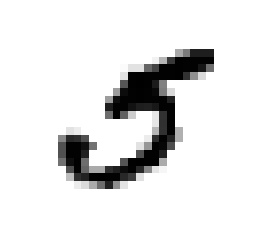

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

# Step 1: Create test set and set aside

already split up for us. First 60000 images for training and last 10000 for test

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle training dataset to guarantee cross-validation folds to be similar (no one set will miss digits)

In [7]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]  

# Step 2a: Train a Binary Classifier

Goal: start with one letter and just train to identify number 5

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)

Pick a classifier and train it.

Use **Gradient Descent**. Can handle large datasets efficiently because it trains instances independently

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

# Step 3a: Deploying a binary classifier

some_digit was previously shown to be a single image of 5

In [10]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [11]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Step 3a: Performance Measures for Binary classifiers

## Measuring accuracy using **Cross-validation**

**Stratified sampling** is done during cross validation. At each iteration:
    1. code creates clone of classifier
    2. Trains that clone on the training folds
    3. Makes predictions on test fold
    4. Counts the number of correct predictions
    5. Outputs the ratio of correct prediction

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9502 ,  0.96565,  0.96495])

Result is accuracy / ratio of correct prodictions on 3 folds (cv) on all cross-validation folds

**BUT LET'S EVALUATE IT FURTHER**

In [13]:
from sklearn.base import BaseEstimator

# will never classify a 5 
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.909  ,  0.90715,  0.9128 ])

It has over 90% accuracy because only ~10% of images are 5. Therefore scoring= accuracy is not preferred when some classes are more frequent than others

## Measuring performance using Confusion Matrix

Confusion matrix. Number of times instances of class A gets confused for class B. Therefore when confused, we also look at another class that always gets confused with it

**Prerequisites**
need to have a set of predictions to be compared to actual targets. only use training set and not test set. So, use cross_val_predict() function 


In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

**What happened?** like cross_val_score, **cross_val_predict()** performs K-fold cross-validation, but returns clean (prediction made by model never saw data in training) prediction for each instance in training set...instead of evaluation scores in cross_val_score

Deploy with the target classes (y_train_5) and the predicted classes (y_train_pred)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

**What does the table mean?**
Row = a class (non-5, 5)
Column = predicted class (correct classification, wrong classification)

**Conclusion**
1. 53,669 correct classified as non-5s / true negatives
2. 910 wrongly classified as 5 / false positives
3. 1,996 incorrectly classified as  as 5 / false negatives
4. 3,425 correctly classified as 5s / true positives



Perfect classifier will only have true negatives and positives as such

    array( [ [53669,   0],        
           [  0,  3425]])

To have a more concise metric, one can look at accuracy of positive predictions:
    
    precision = TP / TP + FP

Need to be reinforced with **recall** or sensitivity or true positive rate because it is possible that:
        
        precision = 1/1 = 100% 
   
One positive prediction out of 1 predictions made will be 100%


**True positive rate** is ratio of positive instances that are correctly detected by the classifiers

        recall = TP (TP + FN)
    

### Deploying **Precision and recall** 

In [16]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.76871350203503808

In [17]:
recall_score(y_train_5, y_train_pred)

0.80132816823464303

**Conclusion:** It's not as good when used with recall or true positive rate

**F sub-1 score** Precision and recall in just one function.

    F sub-1 = 2 / (1/precision) + (1/recall) = TP / [ TP + (FN + FP)/2] 
    
See book for more context

### Deploy **F sub-1**

In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.78468208092485547

### Precision, recall, or F1? All?

See https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 

    Precision = true positives / all values above threshold
    Recall = true positives / all positive values

Scores for those two metrics change depending on threshold

In [19]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 161855.74572176])

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [21]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

**Conclusion:** SGDClassifier accurately identified the 5 if threshold = 0 and did not when increased to 200,000

Therefore, higher threshold means less recall

### **How to decide which threshold to use?**


1. Get the scores of all instances in training set using **cross_val_predict()** but method = 'decision_function' or we want return decision scores instead of predictions
2. With these scores, we can compute the precision and recall for all possible thresholds using **precision_recall_curve()**
    

**1. precision_recall_curve()**

Note: there was an [issue](https://github.com/scikit-learn/scikit-learn/issues/9589) in Scikit-Learn 0.19.0 (fixed in 0.19.1) where the result of `cross_val_predict()` was incorrect in the binary classification case when using `method="decision_function"`, as in the code above. The resulting array had an extra first dimension full of 0s. Just in case you are using 0.19.0, we need to add this small hack to work around this issue:

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

y_scores.shape

(60000,)

In [23]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Plot precision and recall as functions of the threshold value using matplotlib

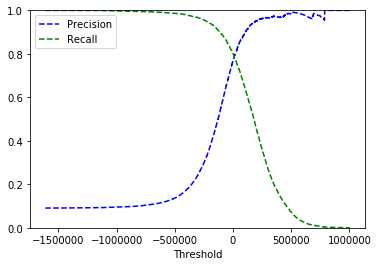

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g--',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

At **80%**, recall is going beyond precision's area, so you may want to go for something like 60% recall. 

Example: if you are aiming for 90% precision. Looking at the chart, we need threshold of ~70,000. 

Do the same process as above to set the threshold

In [26]:
y_train_pred_90 = y_scores > 70000

precision_score(y_train_5, y_train_pred_90)

0.86592051164915484

In [27]:
recall_score(y_train_5, y_train_pred_90)

0.69931746910164172

**Result:** As expected, recall dropped a lot. 

**1. precision_recall_curve()**

**roc_curve()** used to find at which recall rate will false positives start going up. 

Receiver operating characteristic (ROC). Similar to precision/recall curve, but plots true positive rate against false positive rate
        
        False positive rate (FPR) = 1 - true negative rate 

or ratio of negative instances that are incorrectly classified as positive. 

Since true negative rate / TNR is called specificity, the 
        
        ROC curve plots sensitivity/ recall vs. 1 - specificity 
        

**Prerequisites** TPR and FPR for various threshold values, using **roc_curve** function

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr , thresholds = roc_curve(y_train_5, y_scores)

Ploy FPR vs TPR using matplotlib

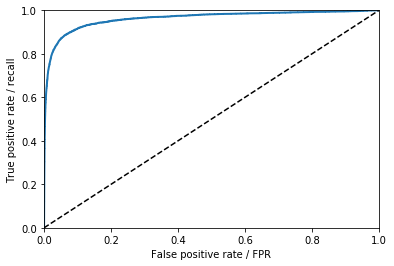

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2,label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate / FPR')
    plt.ylabel('True positive rate / recall')

plot_roc_curve(fpr, tpr)
plt.show()

**Conclusion:** higher recall, higher false positives 

Dotted line = ROC curve of purely random classifier. Good classifier is as far away as possible from dotted line


### ROC curve or precision/recall?

PR if 
    
    1. positive class is rare
    2. you care more about the false positives than false negatives
    
Otherwise, use ROC curve

## Measuring performance using ROC curve`

See previous example. If curve is closer to top right corner, it is a good classifier. Deploy two classifiers and look at their ROC curves. 

Example: RandomForestClassifier vs SGDClassifier based on ROC curve and ROC AUC score


**Get scores for each instance.**
    RandomForestClassifier has **predict_proba** or the probabilities instead of SGDClassifier's decision_function() or the actual predictions 
    

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [31]:
y_probas_forest

array([[ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ]])

In [32]:
y_probas_forest[:,1] 

array([ 0. ,  0.1,  0. , ...,  0. ,  0. ,  0. ])

However, need to have scores instead of probabilities to plot so we use positive class' probability as the score

In [33]:
y_scores_forest = y_probas_forest[:,1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Plot ROC curve

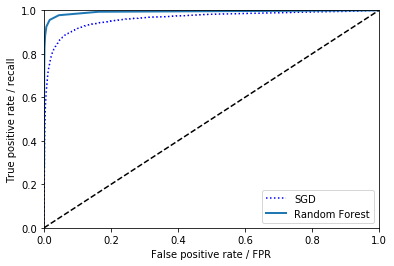

In [34]:
# represents SGD
plt.plot(fpr, tpr, "b:", label='SGD')
# represents Random forest
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

Because RandomForestClassifier's ROC curve is way better, it also has a higher ROC AUC score

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores_forest)

0.99312433660038291

# ------

# Step 2b: Train a Multiclass Classifier

While binary classifiers distinguish between 2 classes -- positive and negative. Multiclass/multinomial classifiers can distinguish between more than 2 classes

## Strategies to perform multiclass classification using multiple binary classifiers


1. One-versus-all approach. Train 10 binary classifiers for each digit 0-9 abd find the output with highest score
2. One versus one approach. Train a binary classifier for every pair of digit

By default, OvA is used

In [36]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [37]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [38]:
np.argmax(some_digit_scores)

5

When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value

In [39]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

If want to use OvO, there is the **OneVsOneClassifier** or **OneVsRestClassifier** classes. 

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [41]:
len(ovo_clf.estimators_)

45

# Step 2c. Validation stage. Cross-evaluation

In [42]:
scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')
scores

array([ 0.84063187,  0.84899245,  0.86652998])

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:", scores.std())

display_scores(scores)

Scores: [ 0.84063187  0.84899245  0.86652998]
Mean: 0.852051434248
Standard Deviation: 0.0107918491508


**It has appox. 85% accuracy on all testfolds**

Simply scaling inputs increases accuracy

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([ 0.91011798,  0.90874544,  0.906636  ])

# 2.d Fine tuning model with Confusion matrix

Assuming we found a promising model and want to improve, we can analyze the types of errors it makes using Confusion matrix

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

To look at the image representation of confusion matrix

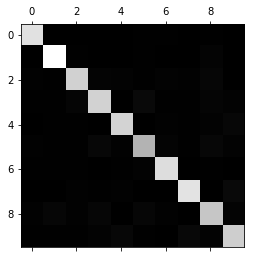

In [46]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

5s look slightly darker than other digits which could mean that there are fewer images of 5s in the dataset or the classifier does not perform well on 5s as on other digits. Let's verify

1. Divide each value in confusion matrix by number of images from corresponding class, so we can compare error rates instead of absolute number of errors (most abundant classes will be bad)


In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

## produced zeroes because 


array([[  9.66570994e-01,   5.06500084e-04,   4.05200068e-03,
          1.51950025e-03,   1.68833361e-03,   8.27283471e-03,
          8.44166807e-03,   1.68833361e-03,   6.58450110e-03,
          6.75333446e-04],
       [  2.96647879e-04,   9.63067339e-01,   6.37792940e-03,
          3.70809849e-03,   1.03826758e-03,   5.93295758e-03,
          7.41619697e-04,   1.48323939e-03,   1.61673094e-02,
          1.18659152e-03],
       [  8.55991944e-03,   6.88150386e-03,   8.93084928e-01,
          1.74555220e-02,   1.49378986e-02,   4.36388050e-03,
          1.46022155e-02,   1.00704935e-02,   2.78616986e-02,
          2.18194025e-03],
       [  7.66595988e-03,   7.50285435e-03,   2.29978796e-02,
          8.71309737e-01,   1.63105529e-04,   3.76773773e-02,
          6.52422117e-03,   8.15527646e-03,   2.29978796e-02,
          1.50057087e-02],
       [  3.25231085e-03,   4.96405341e-03,   7.01814447e-03,
          1.71174255e-03,   9.18521054e-01,   1.54056830e-03,
          9.58575830e-03

2. fill diagonal with just zeroes to keep only the errors

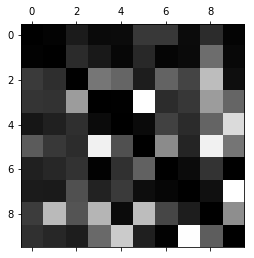

In [48]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Rows represent actual classes, while columns represent predicted classes

If bright, it means it gets confused a lot with other digits. If dark, it is usually classified correctly. 

**Example:** Actual 5s usually get classified as 8

**Conclusion:** classes 8 and 9 should be improved, it's columns are brighter than most. Next is fixing confusion for classes 3 and 5 

We can also analyze individual errors but time-consuming and difficult. Example: classes 3 and 5

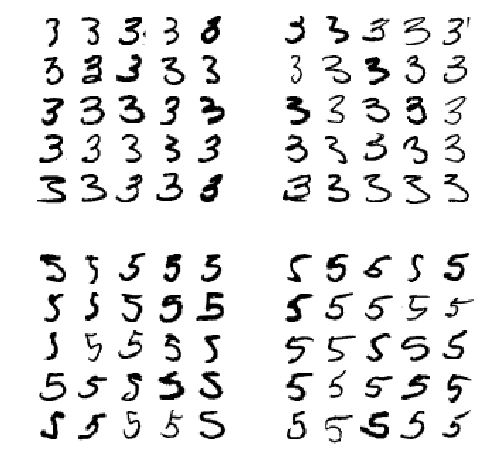

In [53]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

    
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a)   &  (y_train_pred == cl_a) ]
X_ab = X_train[(y_train == cl_a)   &  (y_train_pred == cl_b) ]
X_ba = X_train[(y_train == cl_b)   &  (y_train_pred == cl_a) ]
X_bb = X_train[(y_train == cl_b)   &  (y_train_pred == cl_b) ]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

# ----

# Step 2b: Train a Multilabel classifier

With dataset, it needs to recognized multiple classes with multiple labels. Eg face recognition feature on a group photo

In [55]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
knn_clf.predict([some_digit])


array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average='macro')